# **Explorative Data Analysis** - Sports (Level: Advanced) 
> ###### **The Sparks Foundation:** Graduate Rotational Internship Program - Data Science and Business Analytics (Task 5)
#### **Batch:** February 2022
#### **Author:** Viraj Rajendra Sanap
#### **Topic:** Indian Premier League
#### **Dataset Link:** https://bit.ly/34SRn3b

---
 



**Task:** As a sports analyst, find out the most successful teams, players, and factors contributing win or loss of a team. Suggest teams or players a company should endorse for its products. 

---

### **Libraries**

In [136]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## **Dataset - Matches**

In [137]:
df=pd.read_csv('matches.csv')
df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [138]:
df.shape

(756, 18)

In [139]:
df.size

13608

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [141]:
df.describe

<bound method NDFrame.describe of         id  season  ...         umpire2                  umpire3
0        1    2017  ...        NJ Llong                      NaN
1        2    2017  ...          S Ravi                      NaN
2        3    2017  ...       CK Nandan                      NaN
3        4    2017  ...   C Shamshuddin                      NaN
4        5    2017  ...             NaN                      NaN
..     ...     ...  ...             ...                      ...
751  11347    2019  ...        O Nandan                   S Ravi
752  11412    2019  ...     Nitin Menon                Ian Gould
753  11413    2019  ...             NaN                      NaN
754  11414    2019  ...  Bruce Oxenford  Chettithody Shamshuddin
755  11415    2019  ...       Ian Gould              Nigel Llong

[756 rows x 18 columns]>

In [142]:
df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [143]:
df.duplicated().sum()

0

In [144]:
df['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019])

### **Comparison of Teams winning by maximum runs and wickets**





In [145]:
df.iloc[df['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object

In [146]:
df.iloc[df[df['win_by_runs'].ge(1)].win_by_runs.idxmax()]['winner']

'Mumbai Indians'

In [147]:
df.iloc[df['win_by_wickets'].idxmax()]

id                                                      3
season                                               2017
city                                               Rajkot
date                                           2017-04-07
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
umpire3       

In [148]:
df.iloc[df[df['win_by_wickets'].ge(1)].win_by_wickets.idxmax()]['winner']

'Kolkata Knight Riders'

### **Matches Played Every Season**

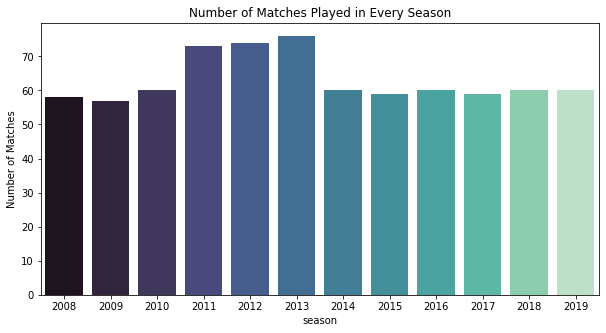

In [149]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='season', palette='mako')
plt.title("Number of Matches Played in Every Season")
plt.ylabel("Number of Matches")
plt.show()

### **Matches Won by Each Team**

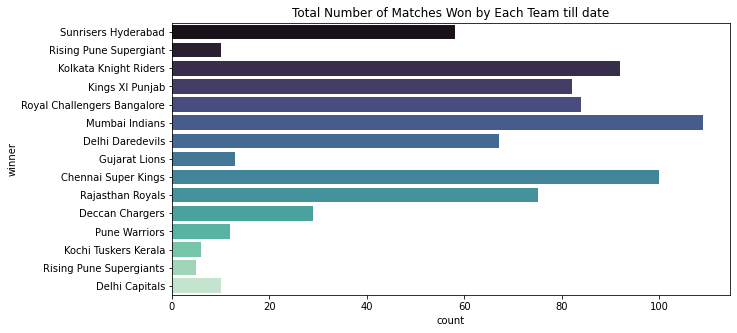

In [150]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='winner', palette='mako')
plt.title("Total Number of Matches Won by Each Team till date")
plt.show()

### **Matches Played in Each City**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


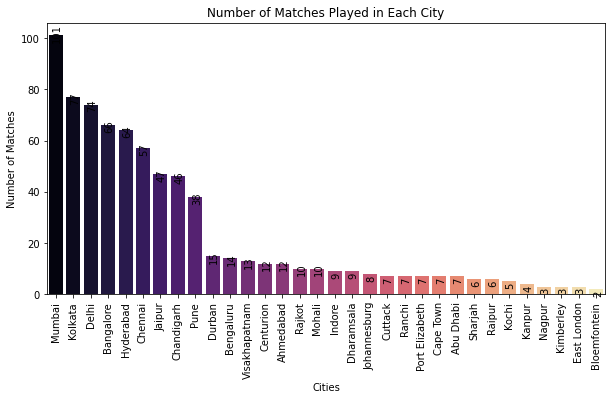

In [151]:
plt.figure(figsize=(10,5))
sns.countplot(df['city'], order=df['city'].value_counts().index, palette='magma')
count=0
cities=pd.DataFrame(df['city'].value_counts())
cities['name']= df['city'].value_counts().index
for i in cities['city']:
  plt.text(count-0.2,i-2,str(i), rotation=90, size=10)
  count+=1

plt.xlabel("Cities")
plt.ylabel("Number of Matches")
plt.xticks(rotation=90)
plt.title("Number of Matches Played in Each City")
plt.show()

### **Player of the Match Statistics**

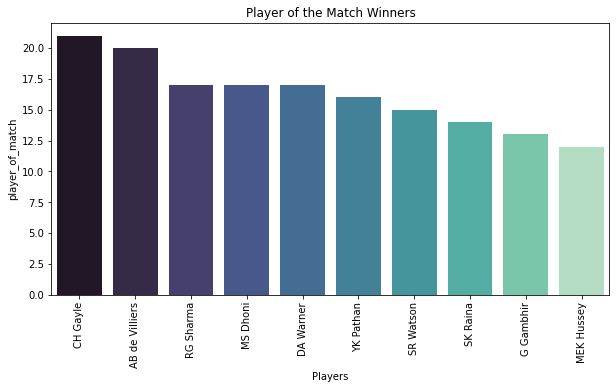

In [152]:
TopPlayers=df.player_of_match.value_counts()[:10]
plt.figure(figsize=(10,5))
plt.xlabel("Players")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.title("Player of the Match Winners")
sns.barplot(x=TopPlayers.index, y=TopPlayers, palette="mako")
plt.show()

### **Impact of the Toss on the Result of the Match**

In [153]:
df['win_by'] = np.where(df['win_by_runs']>0, 'Bat First', 'Bowl First')
toss=df['toss_winner']==df['winner']
toss.groupby(toss).size()

False    363
True     393
dtype: int64

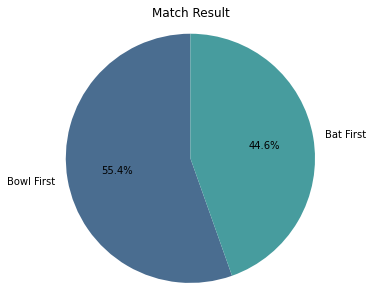

In [154]:
toss = df.win_by.value_counts()
labels = np.array(toss.index)
sizes = toss.values
colors = ['#4A6D90', '#479C9E']
plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, colors=colors,
       autopct='%1.1f%%', startangle=90)
plt.title("Match Result")
plt.axis('equal')
plt.show()

### **Most Successful Teams in terms of Wins**

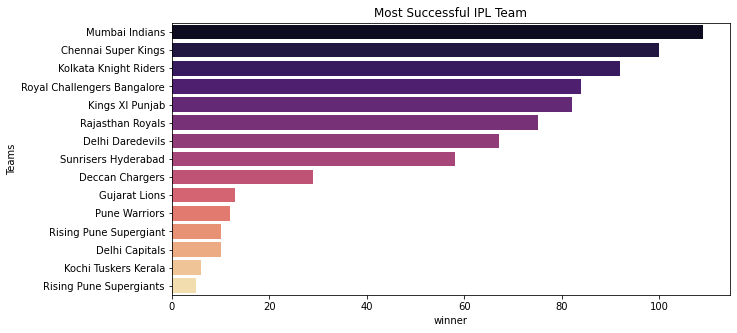

In [155]:
plt.figure(figsize=(10,5))
teams=df.winner.value_counts()
sns.barplot(x=teams, y=teams.index, palette='magma')
plt.title("Most Successful IPL Team")
plt.ylabel("Teams")
plt.show()

## **Dataset - Deliveries**

In [156]:
dfd=pd.read_csv('deliveries.csv')
dfd

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN


In [157]:
dfd.shape

(179078, 21)

In [158]:
dfd.size

3760638

In [159]:
dfd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [160]:
dfd.describe

<bound method NDFrame.describe of         match_id  inning  ... dismissal_kind    fielder
0              1       1  ...            NaN        NaN
1              1       1  ...            NaN        NaN
2              1       1  ...            NaN        NaN
3              1       1  ...            NaN        NaN
4              1       1  ...            NaN        NaN
...          ...     ...  ...            ...        ...
179073     11415       2  ...            NaN        NaN
179074     11415       2  ...            NaN        NaN
179075     11415       2  ...        run out  KH Pandya
179076     11415       2  ...            NaN        NaN
179077     11415       2  ...            lbw        NaN

[179078 rows x 21 columns]>

In [161]:
dfd.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [162]:
dfd.duplicated().sum()

23

In [163]:
dfd.drop_duplicates(inplace=True)
dfd.duplicated().sum()

0

## **Merging Both the Matches and Deliveries Datasets**





In [164]:
d=pd.merge(dfd, df, left_on='match_id', right_on='id')
d

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,win_by
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,Bat First
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,Bat First
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,Bat First
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,Bat First
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,Bat First
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179050,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong,Bat First
179051,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong,Bat First
179052,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong,Bat First
179053,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong,Bat First


In [165]:
d.shape

(179055, 40)

In [166]:
d.size

7162200

In [167]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179055 entries, 0 to 179054
Data columns (total 40 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179055 non-null  int64 
 1   inning            179055 non-null  int64 
 2   batting_team      179055 non-null  object
 3   bowling_team      179055 non-null  object
 4   over              179055 non-null  int64 
 5   ball              179055 non-null  int64 
 6   batsman           179055 non-null  object
 7   non_striker       179055 non-null  object
 8   bowler            179055 non-null  object
 9   is_super_over     179055 non-null  int64 
 10  wide_runs         179055 non-null  int64 
 11  bye_runs          179055 non-null  int64 
 12  legbye_runs       179055 non-null  int64 
 13  noball_runs       179055 non-null  int64 
 14  penalty_runs      179055 non-null  int64 
 15  batsman_runs      179055 non-null  int64 
 16  extra_runs        179055 non-null  int

In [168]:
d.describe

<bound method NDFrame.describe of         match_id  inning  ...      umpire3     win_by
0              1       1  ...          NaN  Bat First
1              1       1  ...          NaN  Bat First
2              1       1  ...          NaN  Bat First
3              1       1  ...          NaN  Bat First
4              1       1  ...          NaN  Bat First
...          ...     ...  ...          ...        ...
179050     11415       2  ...  Nigel Llong  Bat First
179051     11415       2  ...  Nigel Llong  Bat First
179052     11415       2  ...  Nigel Llong  Bat First
179053     11415       2  ...  Nigel Llong  Bat First
179054     11415       2  ...  Nigel Llong  Bat First

[179055 rows x 40 columns]>

In [169]:
d.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170221
dismissal_kind      170221
fielder             172607
id                       0
season                   0
city                  1700
date                     0
team1                    0
team2                    0
toss_winner              0
toss_decision            0
result                   0
dl_applied               0
winner                 372
win_by_runs              0
win_by_wickets           0
player_of_match        372
venue                    0
umpire1                500
u

In [170]:
d.duplicated().sum()

0

### **Most Number of Matches Played in Stadiums**

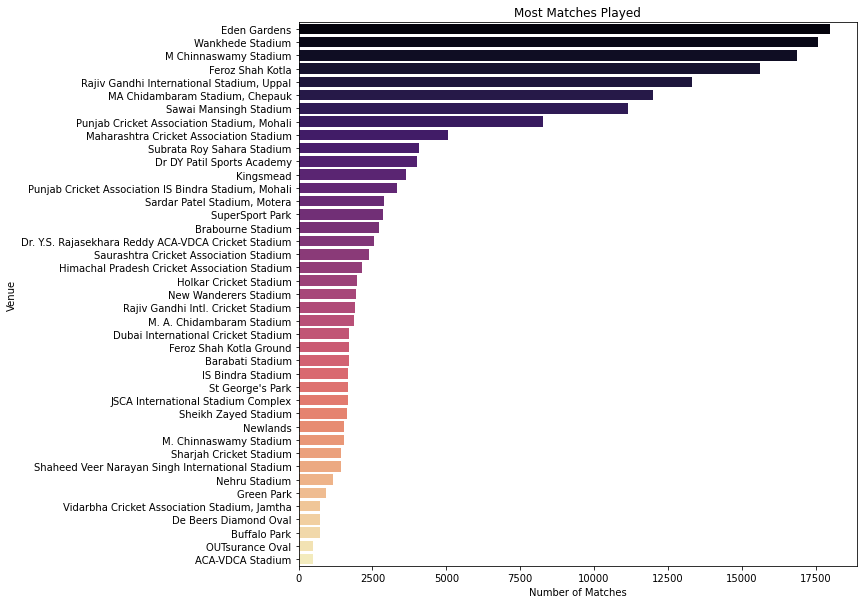

In [171]:
match = d.venue.value_counts()
plt.figure(figsize=(10,10))
sns.barplot(x=match, y=match.index, palette='magma')
plt.title("Most Matches Played")
plt.ylabel("Venue")
plt.xlabel("Number of Matches")
plt.show()

### **Season-Wise Analysis of Winners**

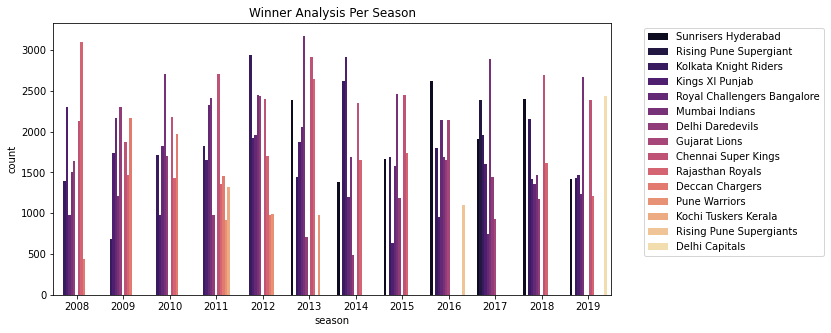

In [172]:
plt.figure(figsize=(10,5))
sns.countplot(data=d, x='season', hue='winner', palette="magma")
plt.legend(bbox_to_anchor=(1.05,1.0), loc="upper left")
plt.title("Winner Analysis Per Season")
plt.show()

### **Impact of Toss Decision**

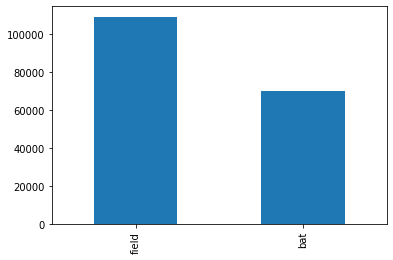

In [173]:
tossd=d.toss_decision.value_counts().plot(kind='bar')
tossd

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Toss Wins vs Match Wins')

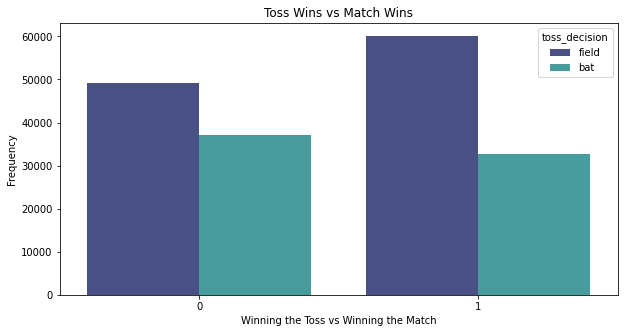

In [174]:
d['team_toss_win']=np.where((d.toss_winner==d.winner),1,0)
plt.figure(figsize=(10,5))
sns.countplot('team_toss_win', data=d, hue='toss_decision', palette='mako')
plt.xlabel("Winning the Toss vs Winning the Match")
plt.ylabel("Frequency")
plt.title("Toss Wins vs Match Wins")

### **Season Finales**

In [175]:
final_matches = df.drop_duplicates(subset=['season'], keep='last')

final_matches[['season','winner']].reset_index(drop=True).sort_values('season')

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


##### **Season Winners in Venues**

In [176]:
final_matches.groupby(['city','winner']).size()

city          winner               
Bangalore     Kolkata Knight Riders    1
              Sunrisers Hyderabad      1
Chennai       Chennai Super Kings      1
              Kolkata Knight Riders    1
Hyderabad     Mumbai Indians           2
Johannesburg  Deccan Chargers          1
Kolkata       Mumbai Indians           2
Mumbai        Chennai Super Kings      2
              Rajasthan Royals         1
dtype: int64

##### **Highest Number of Cup Wins**

In [177]:
final_matches['winner'].value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Rajasthan Royals         1
Deccan Chargers          1
Sunrisers Hyderabad      1
Name: winner, dtype: int64

##### **Toss Decisions in Finals**

In [178]:
final_matches[['toss_winner','toss_decision','winner']].reset_index(drop=True)

,toss_winner,toss_decision,winner
0,Mumbai Indians,bat,Mumbai Indians
1,Rajasthan Royals,field,Rajasthan Royals
2,Royal Challengers Bangalore,field,Deccan Chargers
3,Chennai Super Kings,bat,Chennai Super Kings
4,Chennai Super Kings,bat,Chennai Super Kings
5,Chennai Super Kings,bat,Kolkata Knight Riders
6,Mumbai Indians,bat,Mumbai Indians
7,Kolkata Knight Riders,field,Kolkata Knight Riders
8,Chennai Super Kings,field,Mumbai Indians
9,Sunrisers Hyderabad,bat,Sunrisers Hyderabad


##### **Player of the Match in Finals**

In [179]:
final_matches[['winner','player_of_match', 'season']].reset_index(drop=True)

,winner,player_of_match,season
0,Mumbai Indians,KH Pandya,2017
1,Rajasthan Royals,YK Pathan,2008
2,Deccan Chargers,A Kumble,2009
3,Chennai Super Kings,SK Raina,2010
4,Chennai Super Kings,M Vijay,2011
5,Kolkata Knight Riders,MS Bisla,2012
6,Mumbai Indians,KA Pollard,2013
7,Kolkata Knight Riders,MK Pandey,2014
8,Mumbai Indians,RG Sharma,2015
9,Sunrisers Hyderabad,BCJ Cutting,2016


### **Number of 4s by Each Team in all Seasons**

In [180]:
four = d[d['batsman_runs']==4]
four.groupby('batting_team')['batsman_runs'].agg([('runs by fours','sum'),('fours','count')])

,runs by fours,fours
batting_team,,
Chennai Super Kings,8772,2193
Deccan Chargers,3828,957
Delhi Capitals,968,242
Delhi Daredevils,8632,2158
Gujarat Lions,1840,460
Kings XI Punjab,9832,2458
Kochi Tuskers Kerala,680,170
Kolkata Knight Riders,9736,2434
Mumbai Indians,10352,2588


### **Maximum Number of 4s by Players in all Seasons**

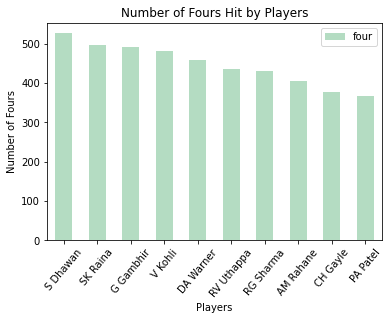

In [181]:
batsman_four = four.groupby('batsman')['batsman_runs'].agg([('four','count')]).reset_index().sort_values('four',ascending=0)
ax = batsman_four.iloc[:10,:].plot('batsman', kind='bar', color='#B4DCC2')
plt.title("Number of Fours Hit by Players")
plt.xticks(rotation=50)
plt.xlabel("Players")
plt.ylabel("Number of Fours")
plt.show()

### **Number of 6s by Each Team in all Seasons**

In [182]:
six = d[d['batsman_runs']==6]
six.groupby('batting_team')['batsman_runs'].agg([('runs by six','sum'),('sixes','count')])

,runs by six,sixes
batting_team,,
Chennai Super Kings,5838,973
Deccan Chargers,2400,400
Delhi Capitals,522,87
Delhi Daredevils,4806,801
Gujarat Lions,930,155
Kings XI Punjab,5856,976
Kochi Tuskers Kerala,318,53
Kolkata Knight Riders,5580,930
Mumbai Indians,6576,1096


### **Maximum Number of 6s by Players in all Seasons**

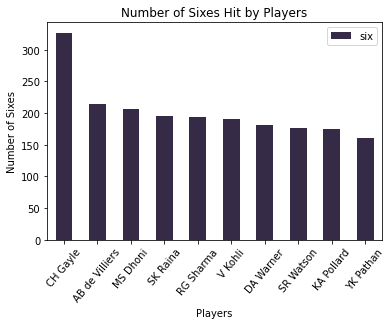

In [183]:
batsman_six = six.groupby('batsman')['batsman_runs'].agg([('six','count')]).reset_index().sort_values('six',ascending=0)
ax = batsman_six.iloc[:10,:].plot('batsman', kind='bar', color='#362B47')
plt.title("Number of Sixes Hit by Players")
plt.xticks(rotation=50)
plt.xlabel("Players")
plt.ylabel("Number of Sixes")
plt.show()

### **Top 10 Run Scorers Throughout all Seasons**

Text(0.5, 1.0, 'Top Run Scorers Till Date')

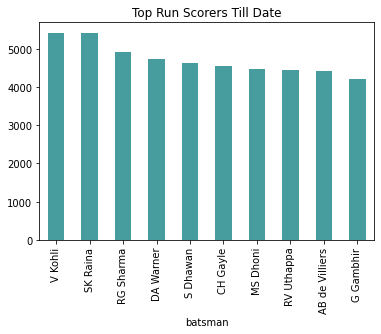

In [184]:
d.groupby('batsman')['batsman_runs'].agg("sum").sort_values(ascending= False).head(10).plot(kind='bar', color='#479C9E')
plt.title("Top Run Scorers Till Date")

### **Maximum Number of Appearances by Batsmen Throughout all Seasons**

In [185]:
app = d[['match_id','player_dismissed']]
app = app.groupby('player_dismissed')['match_id'].count().reset_index().sort_values(
                                                by="match_id",ascending=False).reset_index(drop=True)
app.columns = ['batsman','No_of_Matches']
app.head(10)

,batsman,No_of_Matches
0,SK Raina,162
1,RG Sharma,155
2,RV Uthappa,153
3,V Kohli,143
4,S Dhawan,137
5,G Gambhir,136
6,KD Karthik,135
7,PA Patel,126
8,AM Rahane,116
9,AT Rayudu,115


### **Bowlers with Maxmimum Overs Througout All Seasons**

Text(0.5, 1.0, 'Bowlers with Maximum Overs')

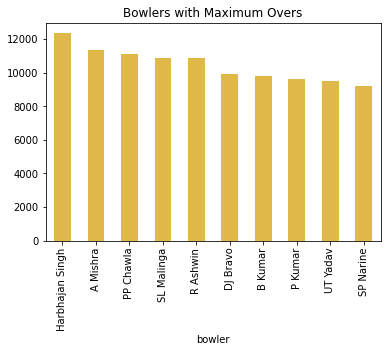

In [186]:
d.groupby('bowler')['ball'].agg("sum").sort_values(ascending=False).head(10).plot(kind='bar', color='#E0B749')
plt.title("Bowlers with Maximum Overs")

### **Bowlers That Gave Maximum Runs Througout All Seasons** 

Text(0.5, 1.0, 'Bowlers That Gave Maximum Runs')

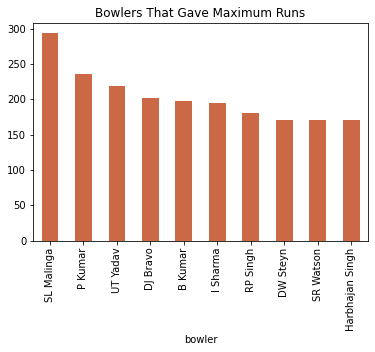

In [187]:
d.groupby('bowler')['extra_runs'].agg("sum").sort_values(ascending=False).head(10).plot(kind='bar', color='#CB6947')
plt.title("Bowlers That Gave Maximum Runs")

### **Top 10 Wicket Takers Throughout all Seasons**

Text(0.5, 1.0, 'Top 10 Wicket Takers')

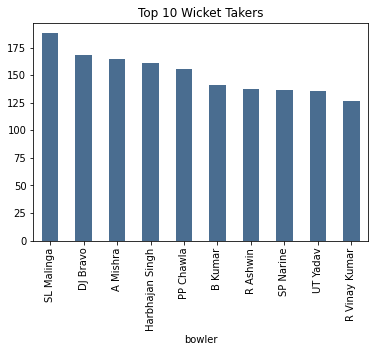

In [188]:
d.groupby('bowler')['player_dismissed'].count().sort_values(ascending=False).head(10).plot(kind='bar', color='#4A6D90')
plt.title("Top 10 Wicket Takers")

---

# **Observations**

1. Mumbai Indians (MI) has won the most number of IPL titles, followed by Chennai Super Kings (CSK) and Kolkata Knight Riders (KKR). The same sequence is followed for maximum number of wins. 
2. Maximum number of matches were played in the years 2013, 2012, and 2011. 
3. MI have won the most number of matched by runs, while KKR hold most win in terms of wickets. 
4. CH Gayle, AB de Villiers, RG Sharma, and MS Dhoni have the most number of Player of the Match awards. 
5. Teams that field first have higher percentage of winning the matches. Accordingly, it is also observable that teams choose to field first on winning the toss.
6. In IPL finals, 9 out of 12 times the team that won the toss, has won the trophy.
7. It can be concluded that teams batting second, even in IPL finals have statistically, less chances of winning. 
8. CSK, MI, and Royal Challengers Bangalore (RCB) have reached the IPL finals maximum number of times. RCB however, is yet to win the title.
9. KKR and Sunrisers Hyderabad (SRH) have reached the finals twice each, with KKR winning both of them and SRK winning once.
10. V Kohli, SK Raina, RG Sharma, DA Warner and S Dhawan have the most number or runs in IPL.
11. MI, KXIP, and KKR have hit the most number of 4s in IPL. S Dhawan, SK Raina, G Gambhir and V Kohli have hit the most number of fours.
12. Most number of 6s in IPL are hit by RCB, MI and KXIP. CH Gayle has over 300 sixes while AB de Villiers, MS Dhoni, SK Raina, and RG Sharma have around 200 sixes. 
13. SK Raina and RG Sharma have appeared as batsmen the most number of times in IPL. SK Raina also has his name in maximum boundaries.
14. Harbhajan Singh, A Mishra and PP Chawla have bowled the maxmimum number of overs in IPL.
15. Top Wicket-Takers in IPL are SL Malinga and DJ Bravo.
16. SL Malinga though being the highest wicket taker is also the bowler to give maximum runs to batsmen. P Kumar, UT Yadav and DJ Bravo follow in giving maximum runs.
17. MI has won the IPL title twice in Hyderabad and and Kolkata each, while Chennai has won twice in Mumbai.
18. Mumbai, Kolkata, Delhi, Bangalore, Hyderabad and Chennai are the cities that host IPL matches.
19. Eden Gardens, Wankhede Stadium, M Chinnaswamy Stadium and Feroz Shah Kotla are the venues that have hosted the maximum IPL matches throughout all seasons. 
20. Teams like MI, CSK and RCB have several players that can be found on the runs and wickets leaderboards. These players contribute a lot to the match result. 
21. Winning the toss is a chance of probability, but winning the match is finally upto the the combined efforts of the players and the team.

# **Conclusion**

> ###### As a sports analyst, the task was to find out the most successful teams, players, and factors contributing win or loss of a team. Suggestions of teams and players a company should endorse for its products are given below.

####**Teams:** Mumbai Indians, Chennai Super Kings, Royal Challengers Bangalore
- **Mumbai Indians (MI)** has the most successful record and has a brilliant set of players. The team has 4 wins to their name as of 2019. MI has RG Sharma, one of the top score runners in IPL and a match-winner having his name on the Player of the Match list. Moreover, the team has SL Malinga, the highest wicket-taker till date in IPL. JJ Bumrah and KA Pollard also have a lot of impact on the team.
- **Chennai Super Kings (CSK)** is the second most successful team and has a strong and stunning set of players in the team led by MS Dhoni, a very composed captain as well as run-scorer in all seasons. CSK is backed by SK Raina, the player with most number of appearancs in IPL and one of the highest run scorers. DJ Bravo also is part of the team who is one of the highest wicket takers.
- **Royal Challengers Bangalore (RCB)** is the third team worth endorsing though this team has not won any titles throughout all the seasons in IPL. Yet, this team is on the list because of its dynamic team combinations. Led by V Kohli, the highest run-scorer throughout IPL, the team also has AB de Villiers who has his own effect in winning matches and boundary firepower, and CH Gayle who surpasses all players in terms of boundary runs. Both de Villers and Gayle have the highest number of Player of the Match.

####**Players:**
- V Kohli
- RG Sharma
- MS Dhoni
- AB de Villiers
- SK Raina
- SL Malinga
- CH Gayle
- DJ Bravo
- DA Warner
- SR Watson

